# Manejo de errores
Incluso el código mejor escrito contendrá errores. Los errores pueden producirse debido a actualizaciones, archivos movidos u otros cambios inesperados. Afortunadamente, Python ofrece una amplia compatibilidad para el seguimiento y el control de errores.

## Tracebacks
---
#### Programa open.py
```
def main():
    open("/path/to/mars.jpg")

if __name__ == '__main__':
    main()
```
Error obtenido en consola:

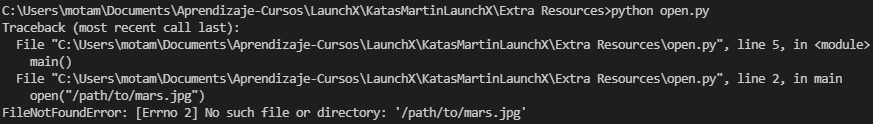

In [1]:
#Código usado para mostrar imágenes en este Notebook, debido a que solo se muestran con Markdown localmente.
from IPython.display import Image
Image("Extra Resources/CapturaError1.png") 

## Controlando las excepciones
---
#### Programa open.py con captura del error

In [3]:
def main():
    try:
        open("/path/to/mars.jpg")
    except FileNotFoundError:
        print("Couldn't find the config.txt file!")

if __name__ == '__main__':
    main()

Couldn't find the config.txt file!


#### Programa config.py
```
def main():
    try:
        configuration = open('config.txt')
    except FileNotFoundError:
        print("Couldn't find the config.txt file!")
if __name__ == '__main__':
    main()
```
Si config.txt es un directorio, se obtienen el siguiente error:

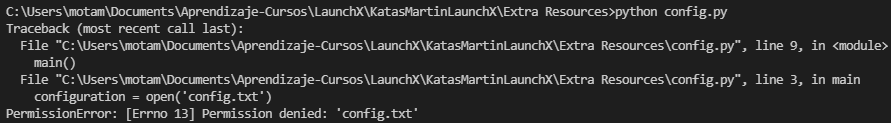

In [2]:
Image("Extra Resources/CapturaError2.png") 

#### Modificación de config.py para detectar todas las excepciones posibles sin traceback
```
def main():
    try:
        configuration = open('config.txt')
    except Exception:
        print("Couldn't find the config.txt file!")
```
Se obtiene el siguiente mensaje en consola:

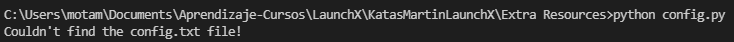

In [3]:
Image("Extra Resources/CapturaError3.png") 

#### Modificación de config.py para detectar excepciones y saber cómo tratar el error
```
def main():
    def main():
    try:
        configuration = open('config.txt')
    except FileNotFoundError:
        print("Couldn't find the config.txt file!")
    except IsADirectoryError:
        print("Found config.txt but it is a directory, couldn't read it")
    except PermissionError:
        print("Found config.txt but permission is denied")
    except (BlockingIOError, TimeoutError):
        print("Filesystem under heavy load, can't complete reading configuration file")
```
Se obtiene el siguiente mensaje en consola:

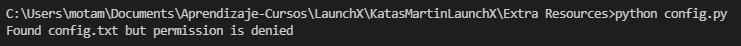

In [4]:
Image("Extra Resources/CapturaError4.png") 

#### Acceso al error asociado a la excepción y a sus atributos

In [28]:
#err se convierte en una variable con el objeto de la excepción como valor
def main():
    try:
        open("config.txt")
    except FileNotFoundError as err:
        print("Got a problem trying to read the file:", err)
        
if __name__ == '__main__':
    main()

Got a problem trying to read the file: [Errno 2] No such file or directory: 'config.txt'


In [30]:
#err.errno permite acceder a los atributos del error,
#esto permite la distincion entre ambos errores del tipo OSError
def main():
    try:
        open("config.txt")
    except OSError as err:
        if err.errno == 2:
            print("Couldn't find the config.txt file!")
        elif err.errno == 13:
            print("Found config.txt but couldn't read it")
        
if __name__ == '__main__':
    main()

Couldn't find the config.txt file!


## Generación de excepciones
---
Los astronautas limitan su uso de agua a unos 11 litros al día. Vamos a crear una función que, con base al número de astronautas, pueda calcular la cantidad de agua que quedará después de un día o más. Se deberá de alertar a los astronautas en caso de que no haya suficiente agua para ellos en los días restantes, es decir, cuando el cálculo resulta menor a 0. Para ello se podría generar una excepción en la función water_left() para alertar de la condición de error:

In [36]:
def water_left(astronauts, water_left, days_left):
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    
    if total_water_left<0:
        raise RuntimeError(f"ALERT!!!\nThere is not enough water for {astronauts} astronauts after {days_left} days!")
        
    return f"Total water left after {days_left} days is: {total_water_left} liters"

print(water_left(4, 100, 2)) #Hay suficiente agua para todos los astronautas.
print(water_left(5, 100, 2)) #NO hay suficiente agua y genera una excepción.

Total water left after 2 days is: 12 liters


RuntimeError: ALERT!!!
There is not enough water for 5 astronauts after 2 days!

Uso de RuntimeError para generar la alerta:

In [40]:
def water_left(astronauts, water_left, days_left):
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    
    if total_water_left<0:
        raise RuntimeError(f"ALERT!!!\nThere is not enough water for {astronauts} astronauts after {days_left} days!")
        
    return f"Total water left after {days_left} days is: {total_water_left} liters"

try:
    water_left(5, 100, 2)
except RuntimeError as err:
    print(err)

ALERT!!!
There is not enough water for 5 astronauts after 2 days!


Actualización de la función water_left() para evitar el paso de argumentos no admitidos con TypeError:

In [50]:
def water_left(astronauts, water_left, days_left):
    for argument in [astronauts,water_left,days_left]:
        try:
            argument/10 #Se verifica que el dato sea entero.
        except TypeError:
            raise TypeError(f"All arguments must be of type int, but received: '{argument}'")
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    
    if total_water_left < 0:
        raise RuntimeError(f"ALERT!!!\nThere is not enough water for {astronauts} astronauts after {days_left} days!")
        
    return f"Total water left after {days_left} days is: {total_water_left} liters"

print(water_left("4", 100, 2)) #Llamada a la función con argumento inválido.

TypeError: All arguments must be of type int, but received: '4'